# Predicting Future Bike Demand in Seoul

**By: Arpit Jain, Tingting Cao, Zhenyang Gai, Sihoon (Daniel) Yu, Yuxuan Mei**

---





<img src="https://github.com/arp-jain/ba-780-team5-public/blob/main/bike_station.jpeg?raw=true" align="center"/> 

##### Source: Xara Brianna

# Executive summary

In this work, our team performed exploratory data analysis (EDA) for the Seoul Bike Rental dataset. We examined all numerical and categorical features, and our target of prediction, which is hourly bike rental demand in Seoul. We also created tables and plots to visualize the relationship between all variables, and see rental demand changes over time and/or at different weather conditions. Moreover, we fitted the training dataset into several models such as linear regression, ridge regression, random forest, and XGBoost to further predict hourly rental bike demand.



# Problem Definition 

Our goal is to use the Seoul Bike Rental database to predict future bike demand based on attributes such as seasons, the weather conditions, and the number of bikes rented per hour. The bikes are are rented out by app based companies such as Seoul Bike.

Currently rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bikes available and accessible to the public at the right time as it decreases the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. Managing the fleet of rental bikes is an important task for Seoul Bike so they can maximize the number of rentals. 



<img src="https://github.com/arp-jain/ba-780-team5-public/blob/main/Bike_App_Store.jpg?raw=true" align="center" width="250"/> 

# Data

## What does our data look like? 

**Seoul Bike Sharing Demand Data Set**

We downloaded the dataset from the University of California-Irvine Machine Learning Repository which can be found [here](https://archive.ics.uci.edu/ml/datasets/Seoul+Bike+Sharing+Demand).

Each row in the dataset represents an hour during a day in which the number of rented bikes are counted, as well as date/time info, and various weather information. There is also a feature if the day was a functioning day or not. 


*   **Date**: Date of data point in MM/DD/YYYY format
*   **Rented Bike Count**: The count of rented bikes per hour 
* **Hour**: The hour of day in 24 h format (0-23) 
* **Temperature(°C)**: The temperature in Celsius
* **Humidity(%)**: The humidity in percentages (0-100) 
* **Wind Speed (m/s)**: The wind speed in meters/second 
* **Visibility (10 m)**: The visibility in meters
* **Dew Point temperature (°C)**: The temperature at which water vapor will condense 
* **Solar Radiation (MJ/m2)**: The amount of solar radiation in megajoules per square meter
* **Rainfall (mm)**: The amount of rainfall in mm 
* **Snowfall (cm)**: THe amount of snow in cm 
* **Seasons**: The current season (Spring, Summer, Fall, Winter) 
* **Functioning Day**: Whether the day was a functioning days for the bike rentals (Yes or No) 

**Basic Information**: 
* 8760 rows 
* There are 14 columns with 13 features and 1 target of prediction  
* No missing values, and all features are the data type they are supposed to be 


In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

df = pd.read_csv("https://raw.githubusercontent.com/arp-jain/BA780teamproject/main/SeoulBikeData%20(1).csv?token=AUXTM27VJLFUAUJBD3FTJULBOBERO",encoding='ISO-8859-1')
df.head(3)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

The Dataset has no missing values. So we can skip the process of replaceing values and imputation.


We are trying to predict hourly rental bike demand. Therefore it is a numerical prediction problem, and we first would like to examine the distribution of rented bike count by hour.

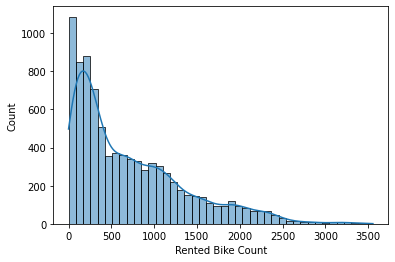

In [ ]:
sns.histplot(data=df,x='Rented Bike Count',kde=True)

From this plot we can see that there is a left distribution of bikes rented out with the most common number of bikes being rented out per hour between 0 and 500.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'When is the best time to repair the bikes?')

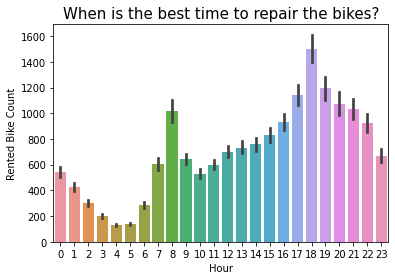

In [ ]:
sns.barplot('Hour','Rented Bike Count',data=df)
plt.title("When is the best time to repair the bikes?", fontsize = 15)

From this plot we can see that most bikes are rented out in two peaks. One of the peaks is during the morning around 8 am, and the other peak is during the evening around 6 pm. We can explore this further and determine if the peaks are due to the office rush during the weekday, or can be during the weekend as well. Therefore, if the company were to take some of the bikes for repair, they should choose when there is the least demand, which is 4-5 AM.

In [ ]:
type(df['Date'])

pandas.core.series.Series

In [ ]:
df['Weekday'] = df['Date'].apply(pd.to_datetime).dt.dayofweek

Here we created a new column called 'Weekday' where depending on the day of the week a number is assigned. A weekday is assigned 1-5 (Mon-Fri), and a weekend day is assigned 6-7 (Sat-Sun). 

In [ ]:
df['Weekday']

0       3
1       3
2       3
3       3
4       3
       ..
8755    4
8756    4
8757    4
8758    4
8759    4
Name: Weekday, Length: 8760, dtype: int64

Text(0.5, 1.0, 'Bikes rented during weekdays')

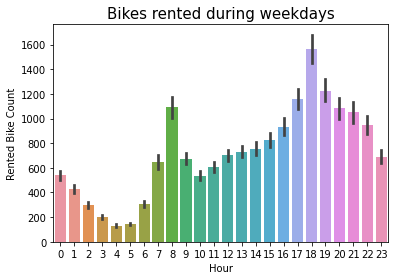

In [ ]:
#Plotting rented bikes during the weekday
sns.barplot(x='Hour', y='Rented Bike Count',
            data=df.loc[df['Weekday'] <6],
           )
plt.title("Bikes rented during weekdays",fontsize=15)

In [ ]:
#Plotting rented bikes during the weekend

From this we can see that there is certainly a surge in bikes rented during the weekdays, but there are also peaks around the same time during the weekends. The peaks during the weekends are generally not as high, and has a lower low than during the weekdays. 

## What is the target of prediction?

Our target feature is the Rented Bike Count in the dataset. This feature is updated hourly letting us know how many bikes are being rented. This feature is important because it allows us to determine how many users rented a bike during that particular hour. Using the other features in the dataset we can predict future bike demand. 

We expect that during inclement weather that the number of rented bikes will be lower, during the colder seasons it will be lower, and during night time hours the amount of bikes rented will be lower. 

## What are the numerical features?

There are ten numerical columns: Rented Bike Count, Hour, Temperature(°C), Humidity(%), Wind speed (m/s), Visibility (10 m), Dew point temperature(°C), Solar Radiation (MJ/m2), Rainfall(mm)	and Snowfall (cm).

We created a scatter matrix for all numerical columns to examine the relationship between every two variables. 

In [ ]:
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Weekday
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,3.021918
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,1.999994
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,1.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,3.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,5.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000,6.000000


                           Rented Bike Count  ...       Weekday
Rented Bike Count                   1.000000  ... -2.157677e-02
Hour                                0.410257  ... -7.324009e-20
Temperature(°C)                     0.538558  ... -4.117209e-03
Humidity(%)                        -0.199780  ... -1.961674e-02
Wind speed (m/s)                    0.121108  ... -3.163420e-02
Visibility (10m)                    0.199280  ...  2.987013e-02
Dew point temperature(°C)           0.379788  ... -1.602018e-02
Solar Radiation (MJ/m2)             0.261837  ... -8.077327e-05
Rainfall(mm)                       -0.123074  ... -6.823037e-03
Snowfall (cm)                      -0.141804  ... -3.146208e-02
Weekday                            -0.021577  ...  1.000000e+00

[11 rows x 11 columns]


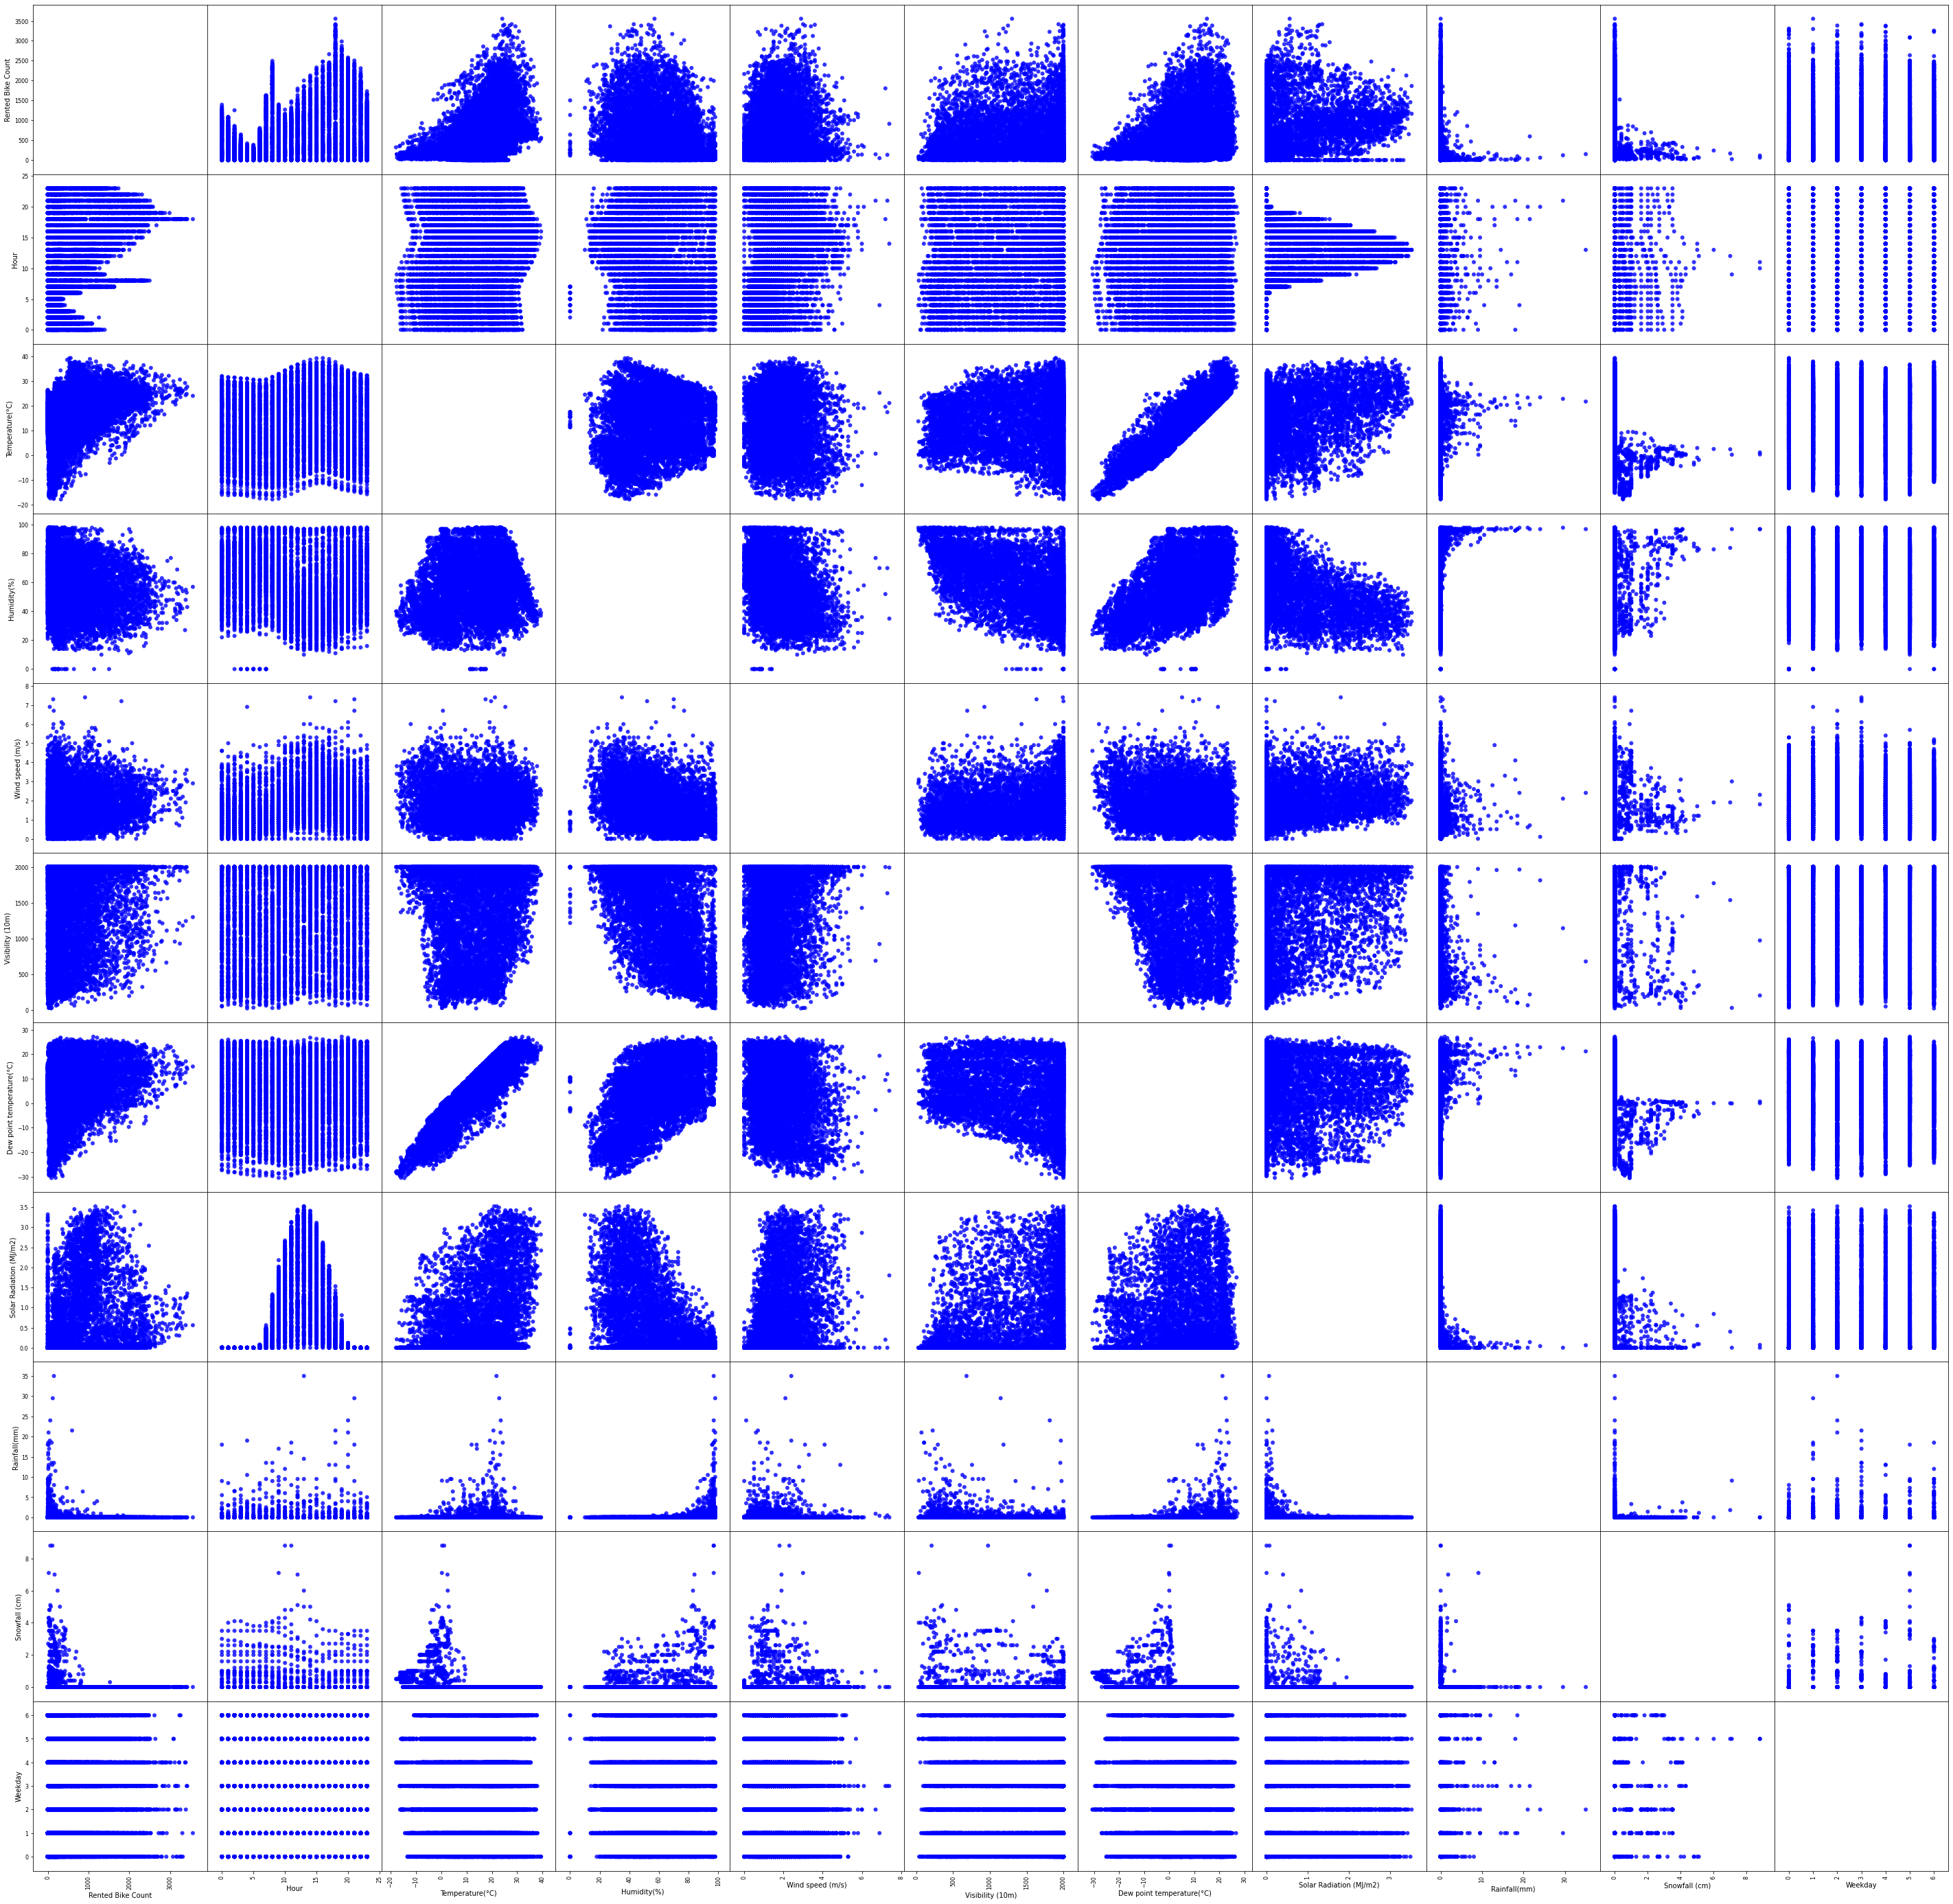

In [ ]:
print(df.corr())

fig = pd.plotting.scatter_matrix(df,figsize=(50,50),c ='blue',marker = 'o',diagonal='',alpha = 0.8,range_padding=0.2)  
#plt.savefig('1.png',dpi=300)
plt.show()

Among all pairwise correlation plots, we find a strong linear relationship between temperature and dew point temperature.

In [ ]:
df.groupby("Hour").agg({'Rented Bike Count':'sum'})

,Rented Bike Count
Hour,
0,197633
1,155557
2,110095
3,74216
4,48396
5,50765
6,104961
7,221192
8,370731


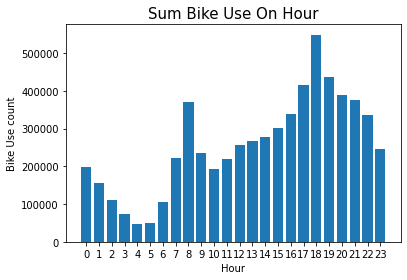

In [ ]:
number=list(df.groupby("Hour").agg({'Rented Bike Count':'sum'})['Rented Bike Count'])
l = list(range(24))
plt.bar(range(len(number)), number, tick_label=l)
plt.title('Sum Bike Use On Hour', fontsize=15)
plt.ylabel('Bike Use count')
plt.xlabel('Hour')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Solar Radiation on Hour')

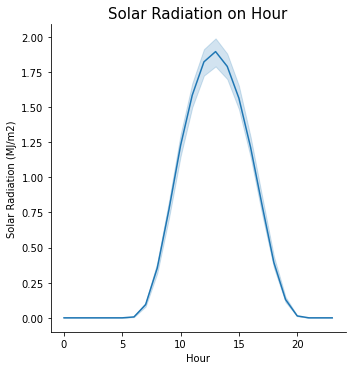

In [ ]:
sns.relplot('Hour','Solar Radiation (MJ/m2)',data=df,kind='line')
plt.title("Solar Radiation on Hour", fontsize = 15)

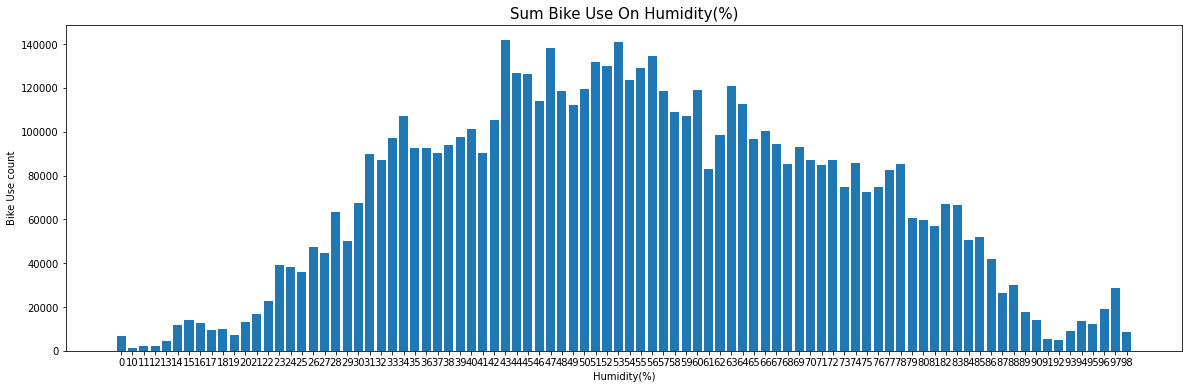

In [ ]:
number=list(df.groupby("Humidity(%)").agg({'Rented Bike Count':'sum'})['Rented Bike Count'])
l = list(df.groupby("Humidity(%)").agg({'Rented Bike Count':'sum'}).index)

plt.figure(figsize=(20, 6))
plt.bar(range(len(number)), number, tick_label=l)
plt.title('Sum Bike Use On Humidity(%)', fontsize=15)
plt.ylabel('Bike Use count')
plt.xlabel('Humidity(%)')
plt.show()

This graph can be better explained when we combine it with the Seasonal Rental Bike pie chart. Solely from this graph, one might assume that users have the highest tendency to rent bikes in between 42 to 55%. While it is true, however, from the pie chart we observed that the demand is the highest during summer. Therefore, we can conclude that the reason behind the bike use count being the highest in between 42 to 55% humidity is due to the number of days with those humidity % being the highest, making the accumulated number greater.

In [ ]:
df.groupby("Temperature(°C)").agg({'Rented Bike Count':'sum'})

,Rented Bike Count
Temperature(°C),
-17.8,322
-17.5,291
-17.4,64
-16.9,36
-16.5,96
...,...
38.0,1184
38.7,475
39.0,1033


In [ ]:
import datetime
weekDays = ("Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday")

In [ ]:
# convert Date column to datetime object
df['Date']= pd.to_datetime(df['Date'], format='%d/%m/%Y')
# new dataframe grouped by days in the week
df_days = df.groupby('Date').sum()

In [ ]:
df_days.reset_index(inplace=True)

In [ ]:
temp=[]
for i in range(len(df_days)):
    temp.append(df_days['Date'][i].weekday())
df_days['Day_of_week'] = temp

In [ ]:
day_of_week = df_days.groupby('Day_of_week').sum()['Rented Bike Count'].to_frame().reset_index()

In [ ]:
for i in range (len(day_of_week)):
  day_of_week['Day_of_week'][i] = weekDays[day_of_week['Day_of_week'][i]]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


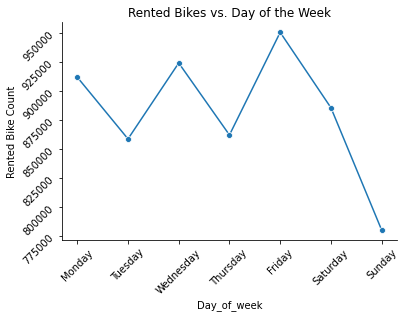

In [ ]:
plt = sns.lineplot(data = day_of_week, 
             x = 'Day_of_week', y = 'Rented Bike Count',
             marker='o')

plt.set_title('Rented Bikes vs. Day of the Week')
plt.tick_params(labelrotation=45)
sns.despine(right=True, top=True, ax=plt)

From the graph we see that the bikes rented is mostly flat during the weekdays, and drops the most on Sunday.

Text(0.5, 0.98, 'Rented Bikes Seasonal Distribution')

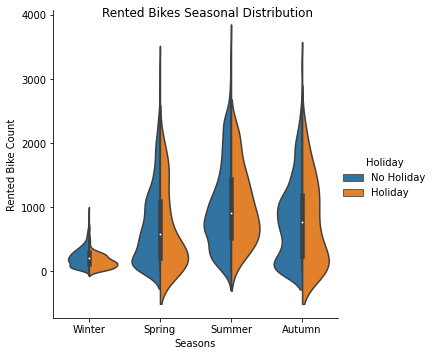

In [ ]:
# a similiar plot
plt = sns.catplot(data=df, x= 'Seasons', y ='Rented Bike Count', kind="violin", hue='Holiday', split=True)
plt.fig.suptitle("Rented Bikes Seasonal Distribution")

This violin plot again shows us that the distribution of bikes rented out, and that there's not much of a difference when looking at holidays, and non-holidays.

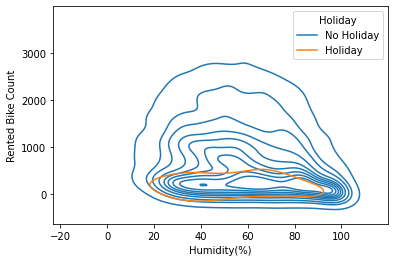

In [ ]:
# KDE plot on humidity
sns.kdeplot(data=df, x= 'Humidity(%)', y ='Rented Bike Count', hue='Holiday')

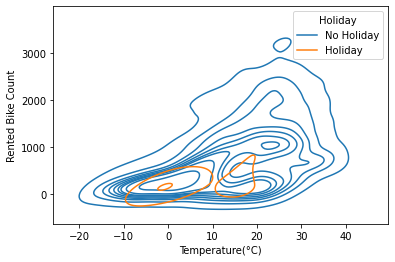

In [ ]:
sns.kdeplot(data=df, x= 'Temperature(°C)', y ='Rented Bike Count', hue='Holiday')

## What are the categorical features?

This dataset has 3 categorical features:
* **Holiday, Seasons and	Functioning Day.**

From the explicit categorical datasets we can split them using dummy variables and Pandas get_dummies function. 

* We split the Holiday feature into 2 columns (is_Holiday and is_Holiday_no, with 1 representing a day with a holiday, and 0 representing a day without a holiday.

* We also split the Seasons feature into 4 columns (is_Winter, is_Summer, is_Autumn, is_Spring) with a 1 representing if its that season, and a 0 representing if its not that season.

* The last categorical feature we have is the Functioning Day feature. This feature is if the bike company is functioning that day, and allowing rentals. We split this into 2 columns (is_Functioning_Day_yes, is_Functioning_Day_no).  

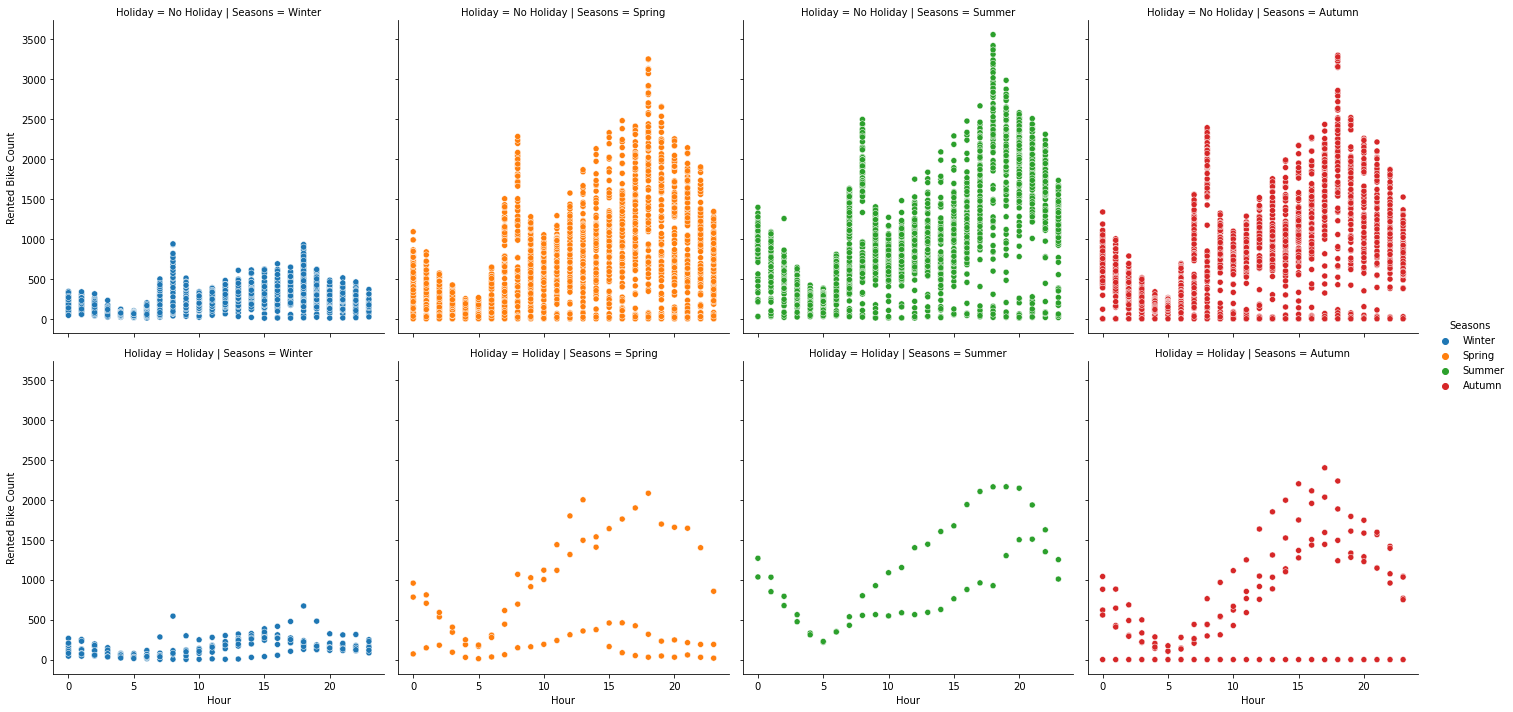

In [ ]:
sns.relplot(data=df, x= 'Hour', y ='Rented Bike Count', col = 'Seasons', row = 'Holiday', hue = 'Seasons')

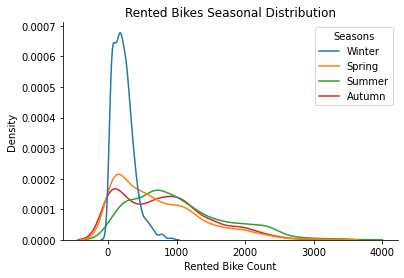

In [ ]:
plt = sns.kdeplot(data=df, x= 'Rented Bike Count', hue='Seasons')
plt.set_title('Rented Bikes Seasonal Distribution')
sns.despine(right=True, top=True, ax=plt)

From the KDE plot above, we can tell during winter, daily rented bikes are clustered between 0-1000 with a high density, whereas the distribution of daily rented bikes in spring, summer, and autumn are spread out more evenly with a wider interquantile range

Correlation heatmap

In order to creat correlation heatmap, we conducted further data preprocessing and used one-hot encoding to encode the categorical features. We also dropped the 'No' columns for binary features.

In [ ]:
#Change data to datetimes and Extract month and day
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [ ]:
#Create dummy variables for Holiday, Functioning Day and Season

#Set all columns to 0 by default
df_w_dummy = pd.get_dummies(df,columns=['Holiday', 'Functioning Day','Seasons'],prefix=['is','is_Functioning_Day','is'])

In [ ]:
#Rearrange and name dataframe as bike
bike = df_w_dummy[['Rented Bike Count','Year','Month','Day','Hour','Temperature(°C)','Dew point temperature(°C)',
                   'Humidity(%)','Wind speed (m/s)','Visibility (10m)','Solar Radiation (MJ/m2)','Rainfall(mm)',
                   'Snowfall (cm)','is_Holiday','is_Functioning_Day_Yes','is_Winter','is_Summer','is_Autumn']]

Text(0.5, 1.0, 'Which features are the most correlated?')

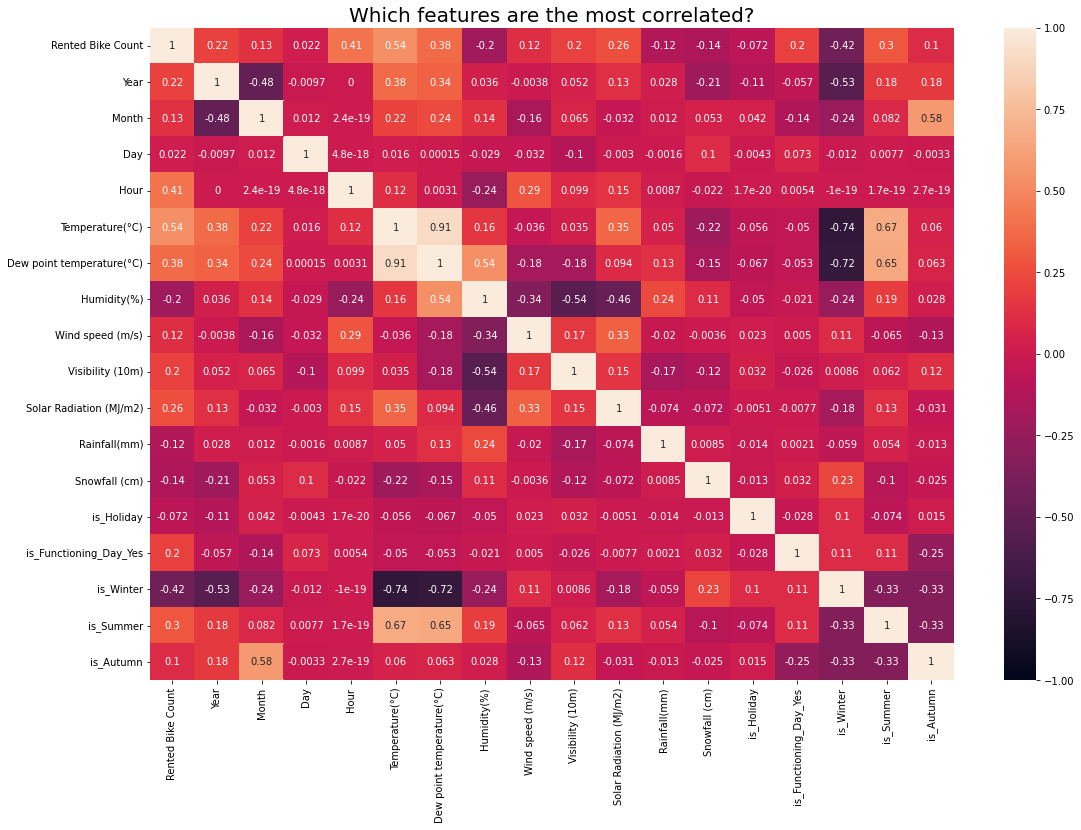

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 12))
sns.heatmap(bike.corr(),vmin=-1,vmax=1,annot=True)
plt.title("Which features are the most correlated?", fontsize=20)

We ran this analysis to examine whether some of the predictors cause the issue of multicollinearity. Quickly we observed 0.91 correlation between temperature and dew point temperature, which is highly correlated. We decided to only keep Temperature. Winter and Summer also displayed high correlation with temperature. However, these predictors should be included for the purposes of categorizing dates into general timeframes and analyzing temperature in smaller scales. 

In [ ]:
from sklearn import metrics

Text(0.5, 1.0, 'Which features are the most correlated?')

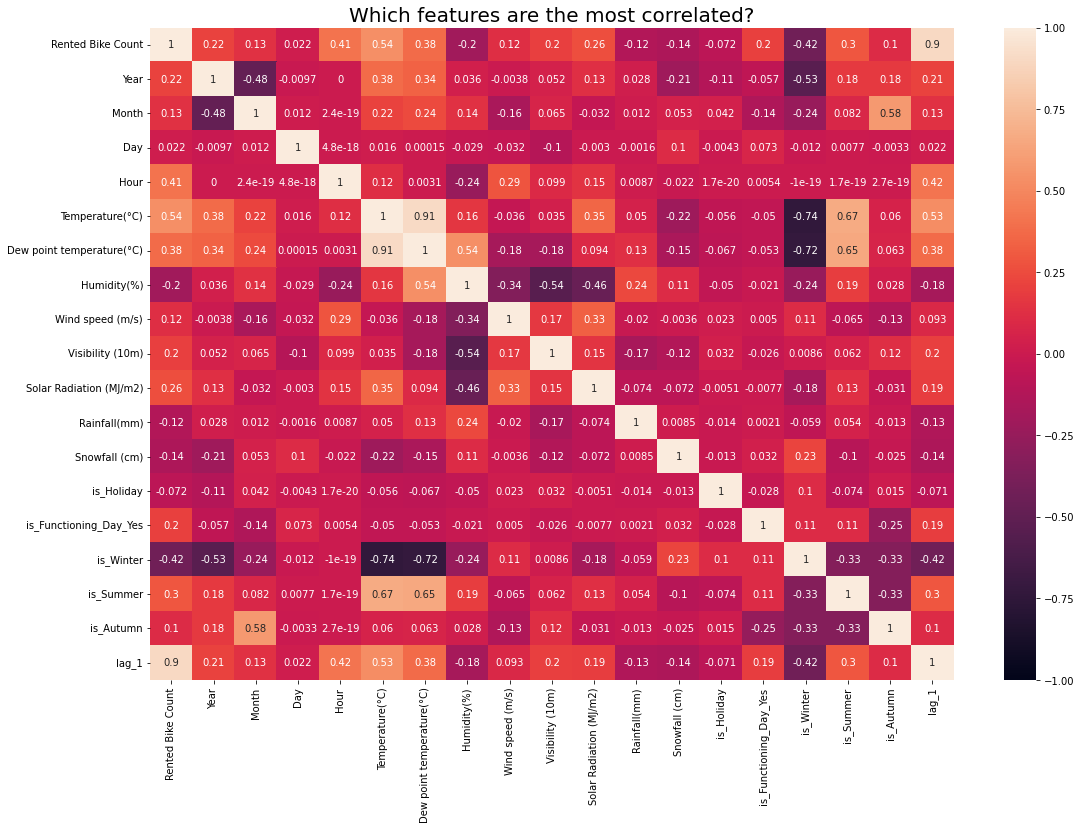

In [ ]:
plt.figure(figsize=(18, 12))
sns.heatmap(bike.corr(),vmin=-1,vmax=1,annot=True)
plt.title("Which features are the most correlated?", fontsize=20)

When looking at a heatmap for the dataframe we see that lag_1 has a coreelation of 0.9 when relating to the Rented Bike Count. This might be due to colinearity, but since this is random forest model the likelyhood is low, especially with one new model. 

## What are some insights from pivot tables and aggregation functions?

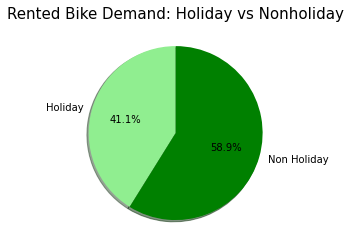

In [ ]:
group = df.groupby("Holiday")
audience = list(df.groupby("Holiday").agg({'Rented Bike Count':'mean'})['Rented Bike Count'])

types = ['Holiday','Non Holiday']



colors = ['lightgreen','green']
plt.pie(audience,
       labels=types,  
       autopct='%1.1f%%', 
       colors=colors,  
        startangle=90,  
         
        shadow=True  
       )
plt.title("Rented Bike Demand: Holiday vs Nonholiday", fontsize=15)
plt.show()

Holiday vs Non-Holiday could be a significant factor in deciding the sharing-bike stations. If simply consider the two categories as "leisure vs work", then having 58.9% for non-holiday would encourage the company to make stations in close proximity from work places or public transportation stations.

In [ ]:
df.pivot_table(values='Rented Bike Count', index='Seasons', columns='Holiday', aggfunc='mean')

Holiday,Holiday,No Holiday
Seasons,,
Autumn,758.483333,823.151163
Spring,635.305556,733.224251
Summer,1022.145833,1034.338426
Winter,156.625000,232.264736


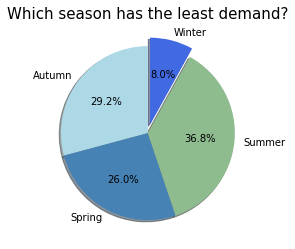

In [ ]:
audience = list(df.groupby("Seasons").agg({'Rented Bike Count':'mean'})['Rented Bike Count'])

types = ['Autumn','Spring','Summer','Winter']



colors = ['lightblue','steelblue','darkseagreen','royalblue']
plt.pie(audience,
       labels=types,  
       autopct='%1.1f%%', 
       colors=colors,  
        startangle=90,  
        explode = [0,0,0,0.1],  
        shadow=True  
       )
plt.title("Which season has the least demand?", fontsize=15)
plt.show()

In [ ]:
df.pivot_table(values='Rented Bike Count', index='Hour', columns='Seasons', aggfunc='mean')

Seasons,Autumn,Spring,Summer,Winter
Hour,,,,
0,623.681319,470.630435,899.065217,165.177778
1,485.714286,356.032609,698.771739,159.055556
2,331.846154,247.467391,505.750000,117.788889
3,225.538462,164.815217,342.673913,77.811111
4,148.593407,105.869565,223.815217,50.477778
5,143.659341,113.652174,245.934783,51.222222
6,316.032967,251.641304,485.836957,92.822222
7,702.186813,601.913043,902.782609,209.566667
8,1197.230769,1013.847826,1418.597826,422.200000


In [ ]:
df.groupby("Functioning Day").agg({'Rented Bike Count':'sum'})

,Rented Bike Count
Functioning Day,
No,0
Yes,6172314


From the table and plots above we can conclude that:

* Seoul bike rental demand in winter is the least among all seasons. 
* Bike rental demand during non-holidays are more than that during holidays. 
* For non-functioning days no bike was rented out. This indicates the bike rental business is closed on non-functioning days.

# What machine learning models can we use for target prediction? 

### Prepare Traning and Test Dataset

In [ ]:
X = bike.drop('Rented Bike Count',axis=1)
y = bike['Rented Bike Count']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Random Forest Model for Prediction



In [ ]:
X_test.head(3)

,Year,Month,Day,Hour,Temperature(°C),Dew point temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),is_Holiday,is_Functioning_Day_Yes,is_Winter,is_Summer,is_Autumn
4059,2018,5,19,3,10.7,6.0,73,1.3,2000,0.00,0.0,0.0,0,1,0,0,0
6914,2018,9,15,2,21.7,17.6,78,1.0,2000,0.00,0.0,0.0,0,1,0,0,1
233,2017,12,10,17,3.6,-2.3,65,4.3,1061,0.03,0.0,0.4,0,1,1,0,0


In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
y_pred = np.round(regressor.predict(X_test))

In [ ]:
RF_y_comparison=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
RF_y_comparison.head(5)

,Actual,Predicted
4059,320,246.0
6914,580,487.0
233,226,436.0
982,165,199.0
5967,646,672.0


In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Random Forest Regression Score:',regressor.score(X_test,y_test)*100)

Mean Absolute Error: 135.30403348554034
Mean Squared Error: 50076.09779299848
Root Mean Squared Error: 223.7768928933425
Random Forest Regression Score: 87.72481582542113


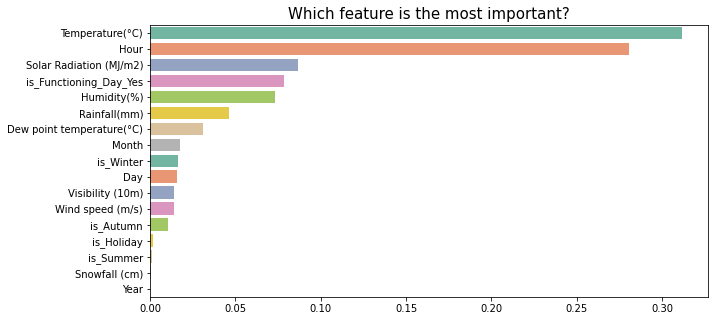

In [ ]:
# Plot features importances
import matplotlib.pyplot as plt
imp = pd.Series(data=regressor.feature_importances_, index=X_test.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
plt.title("Which feature is the most important?", fontsize=15)
ax = sns.barplot(y=imp.index, x=imp.values, palette="Set2", orient='h')

In [ ]:
# Hyperparameters tuning
from sklearn.model_selection import GridSearchCV

param_grid = [{'n_estimators': [500, 1000, 2000], 'max_features': (3, 17), 
               'max_depth': (3, 20, 1)}]

grid_search_forest = GridSearchCV(regressor, param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search_forest.fit(X_train, y_train)


In [ ]:
grid_search_forest.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=20, max_features=12, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [ ]:
from sklearn.metrics import mean_squared_error
rf_cv = grid_search_forest.best_estimator_
y_rf_train = rf_cv.predict(X_train)
y_rf_test = rf_cv.predict(X_test)
rf_mse_train = mean_squared_error(y_train, y_rf_train)
rf_mse_test = mean_squared_error(y_test, y_rf_test)
print('The best Random forest model from the grid search has a MSE of', round(rf_mse_test, 2))

The best Random forest model from the grid search has a MSE of 50508.65


In [ ]:
# Random forest model evaluation after cv
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_rf_test))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_rf_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_rf_test)))
print('Random Forest Regression Score:',regressor.score(X_test,y_rf_test)*100)

Mean Absolute Error: 136.3621296361906
Mean Squared Error: 50508.65184969477
Root Mean Squared Error: 224.74129983092732
Random Forest Regression Score: 99.33689886551514


Weather features and the hour variable are good predictors for Bike Rental Demand. 

On the other hand, snowfall and Year are not important features.

It might be interesting to drop dew point temperature as it highly relates to temperature.


## Linear Regression Model For Prediction

Another type of regression we can look at is the Linear Regression, where we plot a simple line to determine the best fit for predictions. Here we are using the LinearRegression model from sklearn. 

In [ ]:
#Going to be using train, and test data from above
import numpy as np 
from sklearn.linear_model import LinearRegression

In [ ]:
#Creating model 
linear = LinearRegression()
linear.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_linear_train = linear.predict(X_train)
y_linear_test = linear.predict(X_test)

Here we can see that the linear regression score is 0.54. While not the best score it can be improved with further feature engineering. 

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_linear_test))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_linear_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_linear_test)))
print('Random Forest Regression Score:',regressor.score(X_test,y_linear_test)*100)

Mean Absolute Error: 322.9815261362307
Mean Squared Error: 185656.3165629746
Root Mean Squared Error: 430.8785403834526
Random Forest Regression Score: 39.484086001563526


In [ ]:
linear.coef

## Ridge Regression Model for Prediction

In [ ]:
from sklearn.linear_model import Ridge
ridge =Ridge()
ridge.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
y_pred = ridge.predict(X_test)
RF_y_comparison=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
RF_y_comparison

,Actual,Predicted
4059,320,391.051380
6914,580,820.098765
233,226,566.682525
982,165,370.592109
5967,646,1307.811819
...,...,...
2909,96,579.506415
2244,358,532.165655
5121,128,419.180477
322,189,156.752517


In [ ]:
y_pred = np.round(y_pred)
y_pred

array([391., 820., 567., ..., 419., 157., 750.])

In [ ]:

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Ridge Regression Score:',regressor.score(X_test,y_test)*100)

Mean Absolute Error: 322.9063926940639
Mean Squared Error: 185644.34474885845
Root Mean Squared Error: 430.8646478290583
Ridge Regression Score: 54.4918960694446


In [ ]:
# Hyperparameters tuning
params_ridge = {'alpha': (np.logspace(-8, 8, 100))} # It will check from 1e-08 to 1e+08
ridge_cv = GridSearchCV(ridge, params_ridge, cv = 10)


In [ ]:
ridge_cv.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([1.00000000e-08, 1.45082878e-08, 2.10490414e-08, 3.05385551e-08,
       4.43062146e-08, 6.42807312e-08, 9.32603347e-08, 1.35304777e-07,
       1.9630406...
       8.49753436e+04, 1.23284674e+05, 1.78864953e+05, 2.59502421e+05,
       3.76493581e+05, 5.46227722e+05, 7.92482898e+05, 1.14975700e+06,
       1.66810054e+06, 2.42012826e+06, 3.51119173e+06, 5.09413801e+06,
       7.39072203e+06, 1.07226722e+07, 1.55567614e+07, 2.25701972e+07,
       3.27454916e+07, 4.75081016e+07, 6.89261210e+07, 1.00000000e+08])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
y_ridge_train = ridge_cv.predict(X_train)
y_ridge_test = ridge_cv.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_ridge_test))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_ridge_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_ridge_test)))
print('Ridge Regression Score:',regressor.score(X_test,y_ridge_test)*100)

Mean Absolute Error: 322.9201624939422
Mean Squared Error: 185647.09775583894
Root Mean Squared Error: 430.86784256409635
Ridge Regression Score: 39.37708898109786


## XGBoost Model For Prediction

Another regression model we can use is the XGBoost model, which is a grident boosting tree based model that has a large set of hyperparameters availible for tuning. 

In [ ]:
import xgboost
from numpy import loadtxt
from xgboost import XGBRegressor
import xgboost as xgb

In [ ]:
pip install hyperopt

In [ ]:
# import packages for hyperparameters tuning
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

In [ ]:
space={'max_depth': hp.quniform("max_depth", 1, 7, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 0,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 2000,
        'seed': 0
    }

In [ ]:
def objective(space):
    clf=xgb.XGBRegressor(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [( X_train, y_train), ( X_test, y_test)]
    
    clf.fit(X_train, y_train,
            eval_set=evaluation, eval_metric="rmse",
            early_stopping_rounds=10,verbose=False)
    

    pred = clf.predict(X_test)

    mse = metrics.mean_squared_error(y_test, pred)
    return {'loss': -mse, 'status': STATUS_OK }

In [ ]:
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)


In [ ]:
print(best_hyperparams)

{'colsample_bytree': 0.5587971989975633, 'gamma': 6.611841557968282, 'max_depth': 1.0, 'min_child_weight': 6.0, 'reg_alpha': 112.0, 'reg_lambda': 0.3049851257311697}


In [ ]:
clf = XGBRegressor(objective='reg:squarederror', 
                   colsample_bytree = 0.5587971989975633, 
                   gamma = 6.611841557968282, max_depth = 10, 
                   min_child_weight = 6.0, reg_alpha = 112.0, 
                   reg_lambda = 0.3049851257311697 )

In [ ]:
clf.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5587971989975633,
             gamma=6.611841557968282, importance_type='gain', learning_rate=0.1,
             max_delta_step=0, max_depth=10, min_child_weight=6.0, missing=None,
             n_estimators=100, n_jobs=1, nthread=None,
             objective='reg:squarederror', random_state=0, reg_alpha=112.0,
             reg_lambda=0.3049851257311697, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:

y_xgb_train = clf.predict(X_train)
y_xgb_test = clf.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_xgb_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_xgb_test)))
print('XGBoost Regressor Score:',regressor.score(X_test,y_xgb_test)*100)

Mean Absolute Error: 135.68274853572453
Mean Squared Error: 45101.75951633244
Root Mean Squared Error: 212.37174839496058
XGBoost Regressor Score: 96.04784311225096


The MSE for the random forest before the feature engineering was 49582. The new MSE we have with the feature engineering is 16967. In terms of feature importance we see that the day before has the most impact in terms of the prediction for the next day. 

### Feature Engineering

The  type of feature engineering we do is by creating a lag of Rented Bike Count from 1 day up to 7 days. So if there is any one day that impacts another dayh we can see that in the regression model. The extra spaces created in the new columns is just being replaced by the mean of the Rented Bike Count column. Since this is time series data the lag helps us use the previous number of days to predict the next number of bikes rented. 

In [ ]:
#Doing feature engineering by lagging the bike count 

X_train['lag_1'] = X_train['Rented Bike Count'].shift(1).fillna(X_train['Rented Bike Count'].mean())
X_train['humid_temp'] = X_train['Humidity(%)']*X_train['Temperature(°C)']
X_train['wind_vis'] = X_train['Wind speed (m/s)']*X_train['Visibility (10m)']

X_test['lag_1'] = X_test['Rented Bike Count'].shift(1).fillna(X_test['Rented Bike Count'].mean())
X_test['humid_temp'] = X_test['Humidity(%)']*X_test['Temperature(°C)']
X_test['wind_vis'] = X_test['Wind speed (m/s)']*X_test['Visibility (10m)']

#bike['lag_2'] = bike['Rented Bike Count'].shift(2).fillna(bike['Rented Bike Count'].mean())
#bike['lag_3'] = bike['Rented Bike Count'].shift(3).fillna(bike['Rented Bike Count'].mean())
#bike['lag_4'] = bike['Rented Bike Count'].shift(4).fillna(bike['Rented Bike Count'].mean())
#bike['lag_5'] = bike['Rented Bike Count'].shift(5).fillna(bike['Rented Bike Count'].mean())
#bike['lag_6'] = bike['Rented Bike Count'].shift(6).fillna(bike['Rented Bike Count'].mean())
#bike['lag_7'] = bike['Rented Bike Count'].shift(7).fillna(bike['Rented Bike Count'].mean())


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

We found that the lag_2 to lag_7 columns didn't make as much of a difference in the MSE as the lag_1 column so that is the only one we kept. 

We do the train/test split with the feature engineered dataframe. 

Doing the random forest model again which was the best model from before feature engineering to improve it. 

In [ ]:
regressor = RandomForestRegressor(n_estimators = 2000, random_state = 42) #Instatiating random forest model 
regressor.fit(X_train, y_train)

y_pred = np.round(regressor.predict(X_test))


Mean Absolute Error: 71.39916286149163
Mean Squared Error: 17065.28120243531
Root Mean Squared Error: 130.6341502151536
Random Forest Regression Score: 95.81685903194433


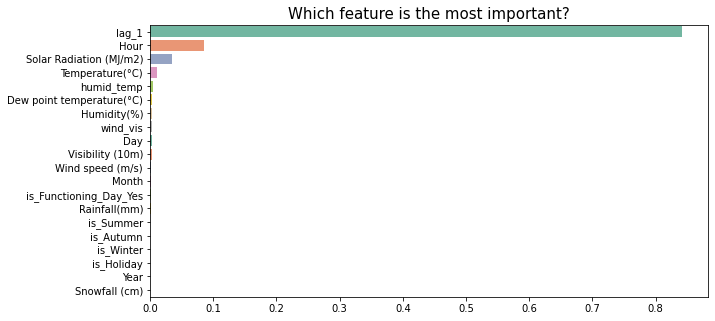

In [ ]:
#Metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Random Forest Regression Score:',regressor.score(X_test,y_test)*100)

# Plot features importances
imp = pd.Series(data=regressor.feature_importances_, index=X_test.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
plt.title("Which feature is the most important?", fontsize=15)
ax = sns.barplot(y=imp.index, x=imp.values, palette="Set2", orient='h')

In [ ]:
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)


In [ ]:
print(best_hyperparams)

{'colsample_bytree': 0.5254722335035407, 'gamma': 8.968025163834476, 'max_depth': 1.0, 'min_child_weight': 10.0, 'reg_alpha': 26.0, 'reg_lambda': 0.5003753530529114}


In [ ]:
clf = XGBRegressor(objective='reg:squarederror', 
                   colsample_bytree = 0.5254722335035407, 
                   gamma = 8.968025163834476, max_depth = 7, 
                   min_child_weight = 10.0, reg_alpha = 26.0, 
                   reg_lambda = 0.5003753530529114 )

In [ ]:
clf.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5254722335035407,
             gamma=8.968025163834476, importance_type='gain', learning_rate=0.1,
             max_delta_step=0, max_depth=7, min_child_weight=10.0, missing=None,
             n_estimators=100, n_jobs=1, nthread=None,
             objective='reg:squarederror', random_state=0, reg_alpha=26.0,
             reg_lambda=0.5003753530529114, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:

y_xgb_train = clf.predict(X_train)
y_xgb_test = clf.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_xgb_test))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_xgb_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_xgb_test)))

Mean Absolute Error: 81.30517833209292
Mean Squared Error: 18531.43294650191
Root Mean Squared Error: 136.13020585638557


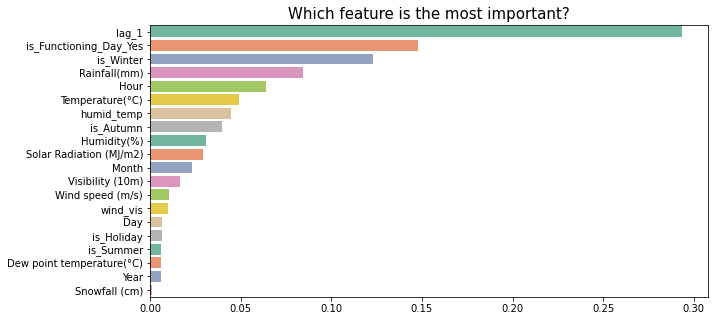

In [ ]:
# Plot features importances
imp_xgb = pd.Series(data=clf.feature_importances_, index=X_test.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
plt.title("Which feature is the most important?", fontsize=15)
ax = sns.barplot(y=imp_xgb.index, x=imp_xgb.values, palette="Set2", orient='h')

# Conclusion 

We conclude that the XGBoost was the best model with a MSE of 18531 compared to the old MSE of 45101 before feature engineering. Another model we used was the Random Forest which has an improved MSE of 16967 compared to an old MSE of 49582. A third model we used was the ridge regression model with a new MSE of 69565 compared to the original MSE of 185644. A forth model we used was the linear regression model with a MSE of 185656. 

The reason the MSE was able to be improved was due to the feature engineering, and creating the lag column which is the rented bike count data as a time series (t-1) compared to (t+1). 

The most important features in the XGBoost model were lag_1, is_Functioning_Day_Yes, and is_Winter. These features all make sense since the lag_1 directly impacts the next day, if the bikes are able to be rented out, and if the season is winter since bikes are not really rented out in winter compared to the summer.


# Code Citations 

[How to convert a date to a number representing the day of the week](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.dayofweek.html)

[Python Linear Regression example](https://realpython.com/linear-regression-in-python/)

[Hyper-parameter optimization for scikit-learn](https://hyperopt.github.io/hyperopt-sklearn/)